# Download Dependencies

In [1]:
! pip install --upgrade kaggle

Requirement already up-to-date: kaggle in /usr/local/lib/python3.7/dist-packages (1.5.12)


In [2]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"moaz47","key":"df155534707966a9ddfe55b1c48b1539"}'}

In [3]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [4]:
#!kaggle datasets download -d aryashah2k/breast-ultrasound-images-dataset
!kaggle datasets download -d abhranta/brain-tumor-detection-mri

 92% 59.0M/64.3M [00:00<00:00, 54.8MB/s]
100% 64.3M/64.3M [00:00<00:00, 77.3MB/s]


In [5]:
! mkdir brain_tumor

! unzip /content/brain-tumor-detection-mri.zip -d brain_tumor

Archive:  /content/brain-tumor-detection-mri.zip
  inflating: brain_tumor/Brain_Tumor_Detection/no/No12.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/No13.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/No14.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/No15.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/No17.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/No18.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/No19.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no0.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no1.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no10.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no100.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no1000.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no1001.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no1002.jpg  
  inflating: brain_tumor/Brain_Tumor_Detection/no/no1003.jpg  
  inflating: brain_tumor/Brai

In [6]:
pip install fastai --upgrade

     |████████████████████████████████| 204kB 7.8MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


# Import Libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import seaborn as sns
import os

from fastai.vision.all import *
from fastai.imports import *

import ipywidgets
from ipywidgets import widget
import shutil

In [8]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True 

seed_everything(42)

# Create directoties for respective classes

In [10]:
_train = '/content/brain_tumor/Brain_Tumor_Detection'
_test = '/content/brain_tumor/Brain_Tumor_Detection/pred'

path_train = Path(_train)
path_test = Path(_test)

In [11]:
print(len(os.listdir(path_train)))
print(len(os.listdir(path_test)))

3
60


In [23]:
print(len(os.listdir(_train+'/no')))
print(len(os.listdir(_train+'/yes')))
print(len(os.listdir(_test)))

1500
1500
60


In [25]:
_no = os.listdir(_train+'/no')
_yes = os.listdir(_train+'/yes')
_pred = os.listdir(_test)

In [39]:
df1 = pd.DataFrame({'name': _no, 'type': 'no'})
df1['name'] = df1['name'].apply(lambda x: str(_train) + '/no/'+ x)

df2 = pd.DataFrame({'name': _yes, 'type': 'yes'})
df2['name'] = df2['name'].apply(lambda x: str(_train) + '/yes/'+ x)

train = pd.concat([df1, df2])
train.head()

,name,type
0,/content/brain_tumor/Brain_Tumor_Detection/no/no32.jpg,no
1,/content/brain_tumor/Brain_Tumor_Detection/no/no853.jpg,no
2,/content/brain_tumor/Brain_Tumor_Detection/no/no1490.jpg,no
3,/content/brain_tumor/Brain_Tumor_Detection/no/no465.jpg,no
4,/content/brain_tumor/Brain_Tumor_Detection/no/no431.jpg,no


In [32]:
test = pd.DataFrame(_pred, columns=['name'])
test['name'] = test['name'].apply(lambda x: str(_test) + '/' + x)
test.head()

,name
0,/content/brain_tumor/Brain_Tumor_Detection/pred/pred33.jpg
1,/content/brain_tumor/Brain_Tumor_Detection/pred/pred1.jpg
2,/content/brain_tumor/Brain_Tumor_Detection/pred/pred43.jpg
3,/content/brain_tumor/Brain_Tumor_Detection/pred/pred34.jpg
4,/content/brain_tumor/Brain_Tumor_Detection/pred/pred38.jpg


# Copy files from source to destination

In [12]:
!mkdir train
!mkdir test

In [33]:
os.chdir('/content/train')

In [16]:
os.listdir(path_train)

['yes', 'pred', 'no']

In [18]:
list_type = os.listdir(path_train)
list_type.remove('pred')
list_type

['yes', 'no']

In [34]:
for i in list_type:
  os.mkdir(i)

In [40]:
destination = '/content/train'
count = 0
for i in list_type:
  li = []
  new_df = train[train['type']==i]
  li = new_df['name'].tolist()
  for j in li:
    shutil.move(j, destination+'/'+i)
    count = count + 1
  print(count)

1500
3000


In [41]:
os.chdir('/content/test')

In [42]:
"""
destination = '/content/test'
count = 0
for i in list_type:
  li = []
  new_df = test[test['type']==i]
  li = new_df['name'].tolist()
  for j in li:
    shutil.move(j, destination+'/'+i)
    count = count + 1
  print(count)
"""
destination = '/content/test'
count = 0
li = []
li = test['name'].tolist()
for j in li:
  shutil.move(j, destination)
  count = count + 1
print(count)

60


In [43]:
os.chdir('/content')

# Modifying train and test dataframes

In [45]:
train['name'] = train['name'].apply(lambda x: x.replace(_train + '/yes', "/content/train/yes"))
train['name'] = train['name'].apply(lambda x: x.replace(_train + '/no', "/content/train/no"))
train.head()

,name,type
0,/content/train/no/no32.jpg,no
1,/content/train/no/no853.jpg,no
2,/content/train/no/no1490.jpg,no
3,/content/train/no/no465.jpg,no
4,/content/train/no/no431.jpg,no


In [47]:
test['name'] = test['name'].apply(lambda x: x.replace(_test, "/content/test"))
test.head()

,name
0,/content/test/pred33.jpg
1,/content/test/pred1.jpg
2,/content/test/pred43.jpg
3,/content/test/pred34.jpg
4,/content/test/pred38.jpg


# Model development

In [48]:
def get_x(r): return r['name']
def get_y(r): return r['type']

size = 256
item_tfms = Resize(256)
batch_tfms = [*aug_transforms(size=size, min_scale=0.75, max_lighting=0.4), Normalize.from_stats(*imagenet_stats)]

dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x= get_x,
                   get_y= get_y, 
                   item_tfms = item_tfms,
                   batch_tfms = batch_tfms
                   )

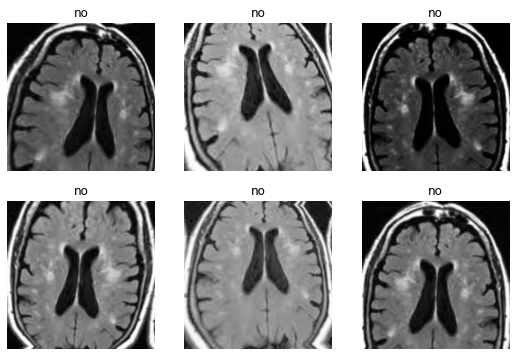

In [49]:
dls = dblock.dataloaders(train, seed=42, bs=32)
dls.show_batch(max_n=6, unique=True)

In [50]:
test_dl = dls.test_dl(test, with_labels=True, seed=42)

In [51]:
loss_func = LabelSmoothingCrossEntropy()
learn = cnn_learner(dls, resnet50, loss_func = loss_func, metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


SuggestedLRs(lr_min=0.00043651582673192023, lr_steep=2.75422871709452e-06)

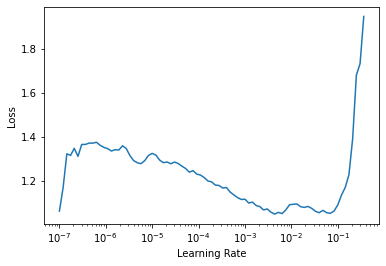

In [52]:
learn.lr_find()

In [53]:
learn.fit_one_cycle(4, 4e-4, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.764630,0.490980,0.891667,00:24
1,0.565265,0.453902,0.901667,00:23
2,0.461182,0.362131,0.956667,00:23
3,0.440867,0.348279,0.955000,00:23


In [54]:
learn.save('bcancer-stage-1')
learn.load('bcancer-stage-1')

SuggestedLRs(lr_min=1.3182566908653825e-05, lr_steep=7.585775847473997e-07)

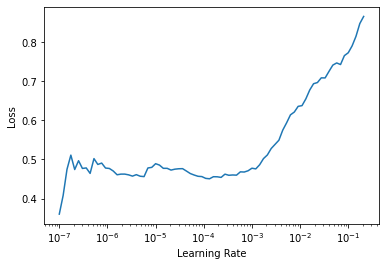

In [55]:
learn.unfreeze()
learn.lr_find()

In [56]:
lr_ufrzn = slice(1e-5, 7e-7)
learn.fit_one_cycle(8, lr_ufrzn, wd=0.2)

epoch,train_loss,valid_loss,accuracy,time
0,0.417599,0.354102,0.953333,00:27
1,0.433352,0.353317,0.956667,00:27
2,0.411928,0.350013,0.960000,00:27
3,0.398593,0.338124,0.961667,00:28
4,0.401248,0.339961,0.963333,00:28
5,0.391968,0.345063,0.965000,00:28
6,0.398444,0.338920,0.965000,00:27
7,0.399363,0.343726,0.963333,00:28


In [57]:
learn.save('bcancer-stage-2')
learn.load('bcancer-stage-2')

In [60]:
score = learn.validate()[1]           
score

0.9633333086967468

In [61]:
learn.export(fname='brain_tumor.pkl')